In [10]:
from PIL import Image
from PIL import ImageFile
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [19]:
im = Image.open("IMG_0354.JPG")
h,w = np.array(im.size) / 2
h,w = int(h), int(w)

In [20]:
im.resize((h,w),Image.BICUBIC)
im.rotate(-90).show()

c:\Users\audre\anaconda3\envs\ee367-hw\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  """Entry point for launching an IPython kernel.


In [1]:
from skimage import io
img = io.imread('IMG_0354.JPG')

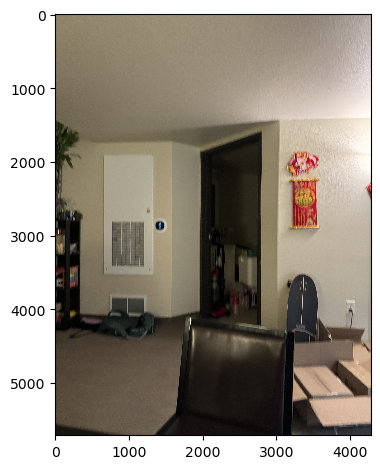

In [2]:
io.imshow(img)

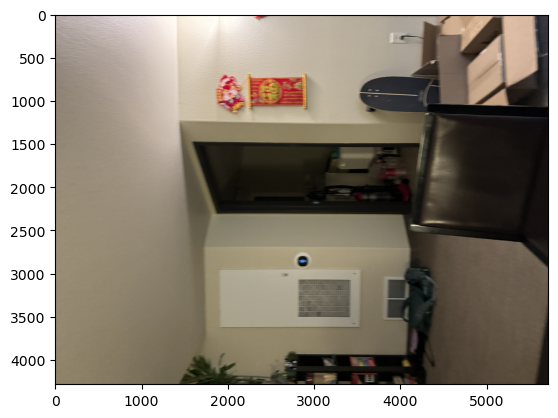

In [3]:
import matplotlib.pyplot as plt
im = plt.imread('IMG_0354.JPG')
plt.imshow(im)

In [1]:
import cv2
vid = cv2.VideoCapture( 'IMG_0383.mov')
height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT) # always 0 in Linux python3
width  = vid.get(cv2.CAP_PROP_FRAME_WIDTH)  # always 0 in Linux python3
print ("opencv: height:{} width:{}".format( height, width))

opencv: height:2160.0 width:3840.0


In [12]:
import cv2
cap = cv2.VideoCapture('live_vid.mov')
count = 0
while cap.isOpened():
    ret,frame = cap.read()
    cv2.imshow('window-name', frame)
    if count % 3 == 0:
    #     cv2.imwrite("video_frames/frame%d.jpg" % count, frame)
        cv2.imwrite("live_vid_frames/frame%d.jpg" % count, frame)
    count = count + 1
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() # destroy all opened windows

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 

### Different Exposures

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Exposure_Times.xlsx")
df.head()

,Munger,Piano,Baymax
0,0.000035,0.000035,0.000096
1,0.000050,0.000035,0.000096
2,0.000081,0.000050,0.000111
3,0.000096,0.000050,0.000141
4,0.000111,0.000081,0.000184


In [3]:
munger = df['Munger'].to_numpy()
munger = munger[~np.isnan(munger)]
munger

array([3.50005250e-05, 5.00000000e-05, 8.09978941e-05, 9.59969281e-05,
       1.11000111e-04, 1.41003948e-04, 1.83891136e-04, 2.46974562e-04,
       3.07976594e-04, 3.84024578e-04, 4.89955904e-04, 6.10873549e-04,
       7.93021412e-04, 9.90099010e-04, 1.24688279e-03, 1.55038760e-03,
       1.98807157e-03, 2.48756219e-03, 3.11526480e-03, 3.98406375e-03,
       5.00000000e-03, 6.25000000e-03, 8.00000000e-03, 1.00000000e-02,
       1.25000000e-02, 1.66666667e-02, 3.33333333e-02])

In [4]:
def df_to_numpy(key_val):
    n = df[key_val].to_numpy()
    return n[~np.isnan(n)]

In [5]:
k = []
names = ['Munger','Piano','Baymax']
for i in names:
    k.append(df_to_numpy(i))
k

[array([3.50005250e-05, 5.00000000e-05, 8.09978941e-05, 9.59969281e-05,
        1.11000111e-04, 1.41003948e-04, 1.83891136e-04, 2.46974562e-04,
        3.07976594e-04, 3.84024578e-04, 4.89955904e-04, 6.10873549e-04,
        7.93021412e-04, 9.90099010e-04, 1.24688279e-03, 1.55038760e-03,
        1.98807157e-03, 2.48756219e-03, 3.11526480e-03, 3.98406375e-03,
        5.00000000e-03, 6.25000000e-03, 8.00000000e-03, 1.00000000e-02,
        1.25000000e-02, 1.66666667e-02, 3.33333333e-02]),
 array([3.50005250e-05, 3.50005250e-05, 5.00000000e-05, 5.00000000e-05,
        8.09978941e-05, 9.59969281e-05, 1.11000111e-04, 1.41003948e-04,
        1.86985789e-04, 2.46974562e-04, 3.07976594e-04, 3.84024578e-04,
        4.89955904e-04, 6.10873549e-04, 7.93021412e-04, 9.90099010e-04,
        1.24688279e-03, 1.55038760e-03, 1.98807157e-03, 2.48756219e-03,
        3.11526480e-03, 8.00000000e-03, 5.00000000e-03, 6.25000000e-03,
        8.00000000e-03, 1.00000000e-02, 1.25000000e-02, 1.66666667e-02,
      

In [6]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [7]:
path = r'C:\Users\audre\OneDrive\Documents\GitHub\EE367_FinalProject\downsized_img'

img_arr = []
for n in names:
    if n == 'Munger':
        idx = 0
    elif n == 'Piano':
        idx = 1
    elif n == 'Baymax':
        idx = 2
    image_list = []
    directory = path + "\\" + n + "\\"
    print(directory)

    for i, filename in enumerate(glob.glob(directory+'*.JPG')): #assuming gif
        im= plt.imread(filename)
        # exposure_time = k[idx][i]
        # image_list.append((im,exposure_time))
        image_list.append(im)
        # foo = Image.open(filename)
        # im = foo.resize((400,300),Image.ANTIALIAS)
        # im.save('downsized_img/'+n+'//'+str(i)+'.jpg',quality=95)
    img_arr.append(image_list)


C:\Users\audre\OneDrive\Documents\GitHub\EE367_FinalProject\downsized_img\Munger\
C:\Users\audre\OneDrive\Documents\GitHub\EE367_FinalProject\downsized_img\Piano\
C:\Users\audre\OneDrive\Documents\GitHub\EE367_FinalProject\downsized_img\Baymax\


In [241]:
baymax_arr = np.array(img_arr[2])
baymax_arr[0].shape

(300, 400, 3)

In [242]:
new_baymax_arr = np.zeros((baymax_arr.shape[0],16,16,3), dtype = int)
for i, m in enumerate(baymax_arr):
    new_baymax_arr[i,:,:] = m[100:116,100:116]
new_baymax_arr.shape

(37, 16, 16, 3)

In [243]:
print(np.max(new_baymax_arr[0]))

1


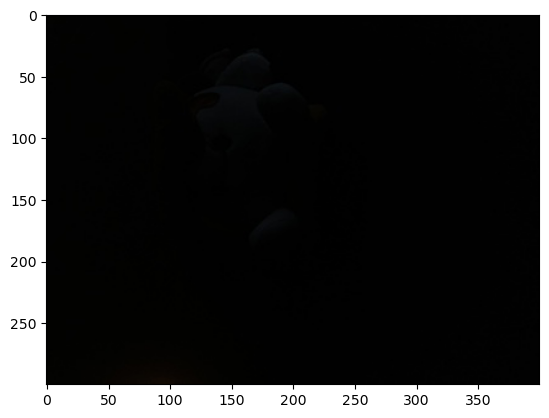

In [244]:
plt.imshow(baymax_arr[0])

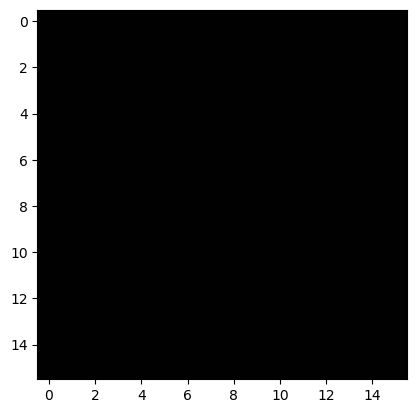

In [245]:
plt.imshow(new_baymax_arr[0])

In [246]:
def get_w(z_new):

    if z_new > 256:
        print(z_new,'z')
    if z_new <= 1/2 * 256:
        return z_new
    else:
        return 256 - z_new

In [247]:
def gsolve(Z,B,l):
    '''
        Z: is the pixel values of pixel location number i in image j
        B: is the log delta t, or log shutter speed, for image j
        l: is lamdba, the constant that determines the amount of smoothness
        w: is the weighting function value for pixel value z
    '''
    n = 256
    Z1_len = Z.shape[0] * Z.shape[1] + n + 1
    Z2_len = Z.shape[0] + n
    A = np.zeros((Z1_len, Z2_len))
    b = np.zeros((A.shape[0],1))

    k = 1
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            # if Z[i,j] >= 255:
            #     print(Z[i,j])
            a = Z[i,j]
            if a <= 1/2 * 256:
                wij = a
            else:
                wij = 256 - a
            A[k,a] = wij
            A[k,n+i] = -wij
            b[k] = wij * B[j]
            # if b[k] == 0:
                # print(wij, B[j])
            k += 1
    A[k,129] = 1
    k+=1
    
    for i in range(0,n-2):
        A[k,i]=l*get_w(i+1)
        A[k,i+1]= -2*l*get_w(i+1)
        A[k,i+2]= l*get_w(i+1)
        k+=1
    
    print(A.shape)
    print(b.shape)
    
    x = np.matmul(A.T,1/(b + 0.00000000000000000000000000000000000000000000000001))
    # x = np.matmul(A.T,1/(b ))
    g = x[0:n]
    lE = x[n:x.shape[0]]

    return g, lE

In [248]:

x = new_baymax_arr.shape

x[2]*x[1]



256

In [249]:
new_baymax_arr.shape

(37, 16, 16, 3)

In [251]:
Z_baymax_arr = new_baymax_arr.transpose([1,2,3,0])
Z_baymax_arr = Z_baymax_arr.reshape((Z_baymax_arr.shape[0]*Z_baymax_arr.shape[1],Z_baymax_arr.shape[2],Z_baymax_arr.shape[3]))
B_munger_lst = np.log(k[2])
l = 0.1



# for i in range(3):
g, le = gsolve(Z_baymax_arr[:,0,:],B_munger_lst,l)

(9729, 512)
(9729, 1)


In [252]:
g, le
print(np.max(g),np.min(g))
print(g.shape)

1.0000000000000007e+50 -1.9999999999999874e+49
(256, 1)


In [253]:
Z_baymax_arr.shape



(256, 3, 37)

In [254]:
print(k[1])

[3.50005250e-05 3.50005250e-05 5.00000000e-05 5.00000000e-05
 8.09978941e-05 9.59969281e-05 1.11000111e-04 1.41003948e-04
 1.86985789e-04 2.46974562e-04 3.07976594e-04 3.84024578e-04
 4.89955904e-04 6.10873549e-04 7.93021412e-04 9.90099010e-04
 1.24688279e-03 1.55038760e-03 1.98807157e-03 2.48756219e-03
 3.11526480e-03 8.00000000e-03 5.00000000e-03 6.25000000e-03
 8.00000000e-03 1.00000000e-02 1.25000000e-02 1.66666667e-02
 2.00000000e-02 2.08333333e-02 3.33333333e-02 4.00000000e-02
 5.00000000e-02 6.66666667e-02 7.69230769e-02 1.00000000e-01
 1.25000000e-01 1.25000000e-01 2.00000000e-01 5.00000000e-01]


In [268]:
g.shape

(256, 1)

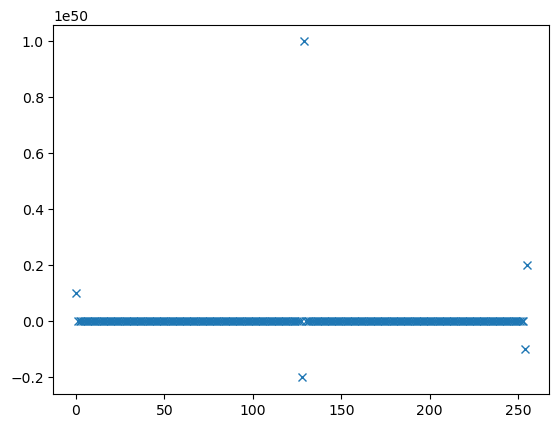

In [271]:
plt.plot(np.arange(256), g, 'x')

In [266]:
E = g - np.log(k[2])
E.shape

(256, 37)

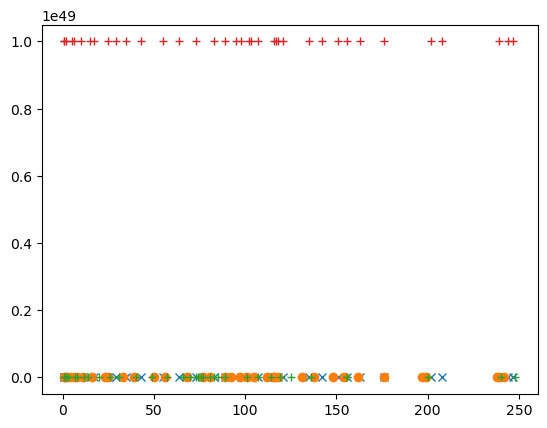

In [267]:
a = Z_baymax_arr[0,0,:]
b = Z_baymax_arr[128,0,:]
c = Z_baymax_arr[200,0, :]
k0 = k[2]

plt.plot(a, np.log(k0),'x')
plt.plot(b, np.log(k0),'o')
plt.plot(c, np.log(k0),'+')
plt.plot(a, E[0,:],'+')

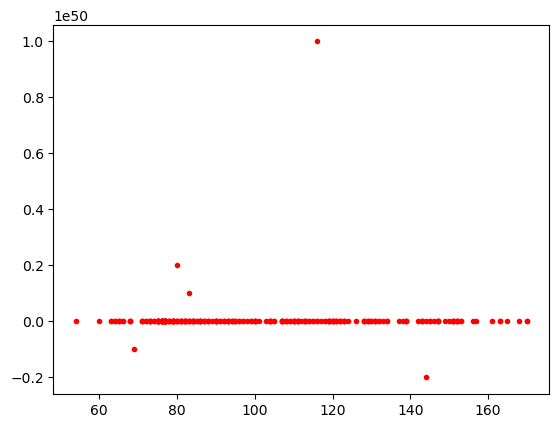

In [230]:
r = Z_baymax_arr[:,0,0]
plt.plot(r,g,'r.')